In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

Plot the progression of histograms to kernels

In [2]:
np.random.seed(1)

In [3]:
N = 20

In [68]:
tmp1 = np.random.normal(0, 1, int(0.3 * N))
tmp2 = np.random.normal(5, 1, int(0.7 * N))
X = np.concatenate((tmp1, tmp2))
X.shape

(20,)

In [69]:
X_plot = np.linspace(-5, 10, 1000)
X_plot.shape

(1000,)

In [70]:
bins = np.linspace(-5, 10, 10)
bins.shape

(10,)

In [188]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

In [189]:
# histogram 1
ax[0,0].hist(X, bins=bins, fc='#AAAAFF', normed=True)
ax[0,0].text(-3.5, 0.31, 'Histogram')

Text(-3.5,0.31,'Histogram')

In [190]:
# histogram 2
ax[0,1].hist(X, bins=bins+0.75, fc='#AAAAFF', normed=True)
ax[0,1].text(-3.5, 0.31, 'Histogram, bins shifted')

Text(-3.5,0.31,'Histogram, bins shifted')

In [191]:
# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X.reshape(-1,1))
log_dens = kde.score_samples(X_plot.reshape(-1,1))

In [192]:
ax[1,0].fill(X_plot, np.exp(log_dens), fc='#AAAAFF')
ax[1,0].text(-3.5, 0.31, 'Tophat Kernel Density')

Text(-3.5,0.31,'Tophat Kernel Density')

In [193]:
# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X.reshape(-1,1))
log_dens = kde.score_samples(X_plot.reshape(-1,1))

In [194]:
ax[1,1].fill(X_plot, np.exp(log_dens), fc='#AAAAFF')
ax[1,1].text(-3.5, 0.31, 'Gaussian Kernel Density')

Text(-3.5,0.31,'Gaussian Kernel Density')

In [195]:
for axi in ax.ravel():
    axi.plot(X, np.zeros(X.shape[0]) - 0.01, '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
    axi.set_xlabel('x')

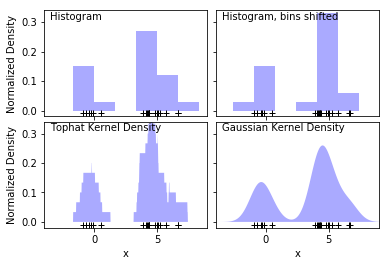

In [196]:
plt.show()

Plot a 1D density example

In [197]:
np.random.seed(1)

In [198]:
N = 100

In [199]:
tmp1 = np.random.normal(0, 1, int(0.3*N))
tmp2 = np.random.normal(5, 1, int(0.7*N))
X = np.concatenate((tmp1, tmp2))
X.shape

(100,)

In [200]:
X_plot = np.linspace(-5, 10, 1000)
X_plot.shape

(1000,)

In [256]:
true_dens = 0.3*norm(0,1).pdf(X_plot) + 0.7*norm(5,1).pdf(X_plot)
plt.fill(X_plot, true_dens, fc='black', alpha=0.2, label='input distribution')

In [257]:
for kernel in ['gaussian', 'tophat', 'epanechnikov']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X.reshape(-1,1))
    log_dens = kde.score_samples(X_plot.reshape(-1,1))
    plt.plot(X_plot, np.exp(log_dens), '-', label='kernel = {}'.format(kernel))

In [258]:
plt.text(6, 0.35, 'N = {} points'.format(N))
plt.legend(loc='upper left')
plt.plot(X, -0.005-0.01*np.random.random(X.shape[0]), '+k')

In [259]:
plt.xlim(-4, 9)
plt.ylim(-0.02, 0.4)

(-0.02, 0.4)

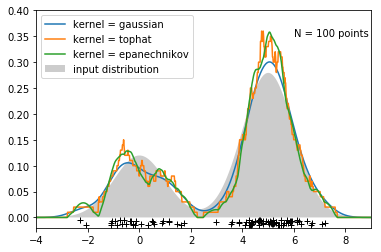

In [260]:
plt.show()